## Simple Linear Regression
In diesem Notebook wird eine Lineare Regression berechnet, um den Preis anhand der Wohnfläche in m2 vorherzusagen.
Um ein genaueres Modell zu erhalten, wurden die Immobilien in Ihre verschiedenen Typen unterteilt.
War das Modell weiterhin ungenau wurden weitere Unterscheidungen getroffen.

In [271]:
#import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import norm
import seaborn as sns

### Dataframe einlesen und nach Kategorien sortieren

In [272]:
#Load cleaned Dataframe
df = pd.read_csv('../data/clean/immoscout_v2.csv')

In [273]:
# drop 'unified_' from column names
df.columns = df.columns.str.replace('unified_', '')

In [274]:
#all columns with 'type_' in name
type_cols = [col for col in df.columns if 'type_' in col]
# remove all 'unified_' from type_cols
type_cols = [col.replace('unified_', '') for col in type_cols] 

#Dictionnary with all type sorted dataframes
by_type = dict()

for t in type_cols:
    by_type[t] = df[df[t] == 1]

### Funktionen für die Lineare Regression

In [275]:
#Ffunction for linear regression
def price_livingspace(df):
    y = df['price_cleaned'].values
    x = df['Living space'].values
    #cleaning Data
    mask = ~pd.isna(x) & ~pd.isna(y)
    x = x[mask]
    y = y[mask]
    x = x.reshape(-1,1)
    y = y.reshape(-1,1)
    #Linear Regression
    model = LinearRegression(fit_intercept= True).fit(x, y)
    x_new = np.arange(x.min(),x.max()).reshape(-1,1)
    y_new = model.predict(x_new)
    #Test Score
    r_2 = model.score(x,y)
    #MAE
    y_pred = model.predict(x)
    mae = mean_squared_error(y, y_pred)
    # MAPE
    mape = np.mean(np.abs((y - y_pred) / y)) * 100
    #RMSE
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    print('MSE: ', r_2)
    print('MAE: ', mae)
    print('MAPE: ', mape)
    print('RMSE: ', rmse)
    plt.scatter(x,y)
    plt.plot(x_new,y_new, color = 'r')
    plt.ylabel('Preis in CHF')
    plt.xlabel('Fläche in m2')
    plt.title('Linear Regression')
    plt.show()
    
    #Residuenanalyse
    predict= model.predict(x)
    resid = y-predict 
    plt.scatter(x,resid)
    plt.ylabel('Residuen')
    plt.xlabel('y geschätzt')
    plt.title('Residuenverteilung')
    plt.show()
    
    #Distribution of resid
    n, bins, patches = plt.hist(resid, bins=100, facecolor='blue',stacked=True,density=True)

    mu = np.average(resid)
    sigma = np.std(resid)
    #Plot Normalverteilung
    y_norm = norm.pdf(bins, mu, sigma)
    plt.plot(bins, y_norm)
    plt.xlabel('Residuen')
    plt.ylabel('Häufigkeiten')
    plt.title('Residuenverteilung')
    plt.show()


In [276]:
#Ridge Regression
def price_livingspace_ridge(df):
    y = df['price_cleaned'].values
    x = df['Living space'].values
    #cleaning Data
    mask = ~pd.isna(x) & ~pd.isna(y)
    x = x[mask]
    y = y[mask]
    x = x.reshape(-1,1)
    y = y.reshape(-1,1)
    #Ridge Regression
    model = Ridge(fit_intercept= True).fit(x, y)
    x_new = np.arange(x.min(),x.max()).reshape(-1,1)
    y_new = model.predict(x_new)
    #Test Score
    r_2 = model.score(x,y)
    #MAE
    y_pred = model.predict(x)
    mae = mean_squared_error(y, y_pred)
    # MAPE
    mape = np.mean(np.abs((y - y_pred) / y)) * 100
    #RMSE
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    print('MSE: ', r_2)
    print('MAE: ', mae)
    print('MAPE: ', mape)
    print('RMSE: ', rmse)
    plt.scatter(x,y)
    plt.plot(x_new,y_new, color = 'r')
    plt.ylabel('Preis in CHF')
    plt.xlabel('Fläche in m2')
    plt.title('Linear Regression')
    plt.show()

In [277]:
#Lasso Regression
def price_livingspace_lasso(df):
    y = df['price_cleaned'].values
    x = df['Living space'].values
    #cleaning Data
    mask = ~pd.isna(x) & ~pd.isna(y)
    x = x[mask]
    y = y[mask]
    x = x.reshape(-1,1)
    y = y.reshape(-1,1)
    #Lasso Regression
    model = Lasso(fit_intercept= True).fit(x, y)
    x_new = np.arange(x.min(),x.max()).reshape(-1,1)
    y_new = model.predict(x_new)
    #Test Score
    r_2 = model.score(x,y)
    #MAE
    y_pred = model.predict(x)
    mae = mean_squared_error(y, y_pred)
    # MAPE
    mape = np.mean(np.abs((y - y_pred) / y)) * 100
    #RMSE
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    print('MSE: ', r_2)
    print('MAE: ', mae)
    print('MAPE: ', mape)
    print('RMSE: ', rmse)
    plt.scatter(x,y)
    plt.plot(x_new,y_new, color = 'r')
    plt.ylabel('Preis in CHF')
    plt.xlabel('Fläche in m2')
    plt.title('Linear Regression')
    plt.show()
    


In [278]:
#Functio for plotting 'price-cleaned' vs 'Living space'
def plot_data(dataframe):
    plt.scatter(dataframe['price_cleaned'], dataframe['Living space'])
    plt.xlabel('Preis in CHF')
    plt.ylabel('Living Space')
    plt.title('Preis vs Living Space')
    plt.show()

### Untersuchung Lineare Regression ganzer Datensatz

#### Merkmale der Residuenanalyse:
1. Residuen müssen um 0 Verteil sein
2. Residuen müssen gleichmässig verteilt sein
3. Residuen müssen Normalverteilt sein


#### Metriken:

**MAPE**: Mean Absolute Percentage Error

Der MAPE zeigt uns den durchschnittlichen Vorhersagefehler in Prozent. 
Vorteile des MAPE sind, dass er die Grösse des Fehlers relativ zum Wert des Vorhersageobjekts misst und somit die Grösse des Fehlers in Relation zum Wert des Objekts misst.
Seine Nachteile sind, dass er für negative Vorhersagen nicht geeignet ist.


**MAE**: Mean Absolute Error


Der MAE zeigt uns den durchschnittlichen Vorhersagefehler. 
Vorteile des MAE sind, dass er die Grösse des Fehlers misst und uns somit den Fehler relativ in Bezug zu der Grösse zurückgibt.


**RMSE**: Root Mean Squared Error

Der RMSE zeigt uns den durchschnittlichen Quadratischen Vorhersagefehler.
Vorteile des RMSE sind, dass er die quadratische Abweichung verwendet, was bedeutet, dass große Abweichungen stärker gewichtet werden als kleine Abweichungen. Dies kann dazu beitragen, dass extreme Werte (wie Ausreißer) einen größeren Einfluss auf die Genauigkeit der Vorhersage haben.


**MSE**: Mean Squared Error
Der Mean Squared Error zeigt uns den durchschnittlichen Quadratischen Vorhersagefehler.

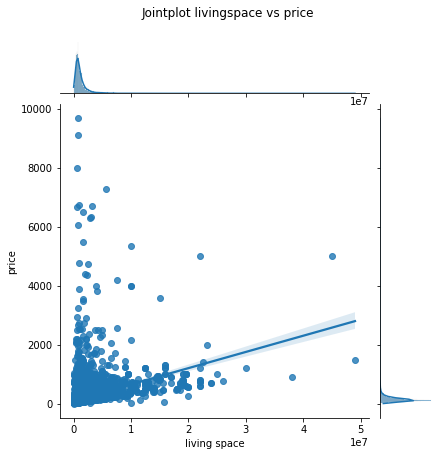

In [279]:
fig = sns.jointplot(x = df['price_cleaned'], y= df['Living space'], kind='reg')
fig.fig.suptitle('Jointplot livingspace vs price', y=1.05)
fig.set_axis_labels('living space', 'price')
plt.show()

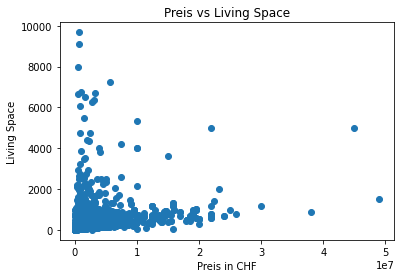

In [280]:
plot_data(df)

Ohne unterteilung in die verschiedenen Typen ist praktisch kein Linearer zusammenhang zwischen Preis und Wohnfläche erkennbar.
Deshalb werden die Daten in Ihre verschiedenen Kategorien unterteilt.

R^2:  0.1315004098232807
MAE:  2505225908571.8774
MAPE:  92.07326309046334
RMSE:  1582790.5447569105


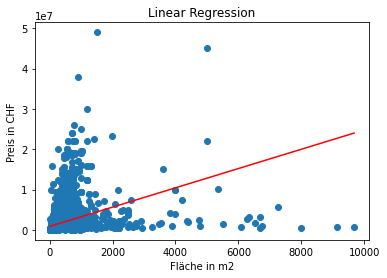

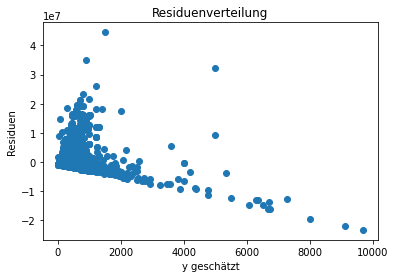

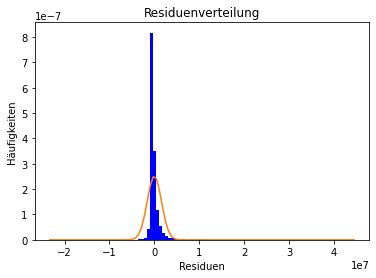

In [281]:
price_livingspace(df)

In [282]:
# variable transformation
df['price_cleaned'] = df['price_cleaned']**0.5
df['Living space'] = df['Living space']**0.5

R^2:  0.3323968805987465
MAE:  148143.7774213884
MAPE:  24.796395134733608
RMSE:  384.8945016772627


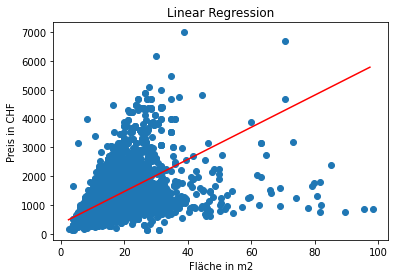

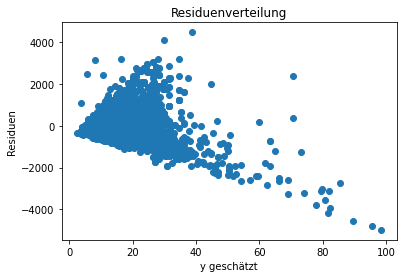

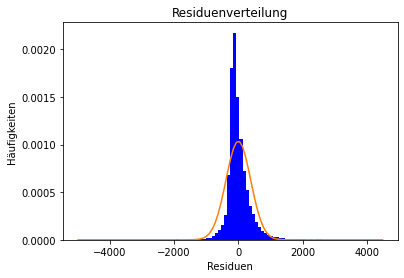

In [284]:
price_livingspace(df)

### Lineare Regression in verschiedenen Kategorien

##### attic-flat

R^2:  0.3968574432801164
MAE:  742012970359.0602
MAPE:  48.1941260927767
RMSE:  861401.7473624373


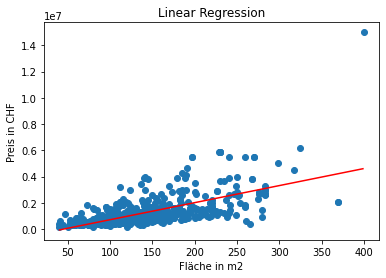

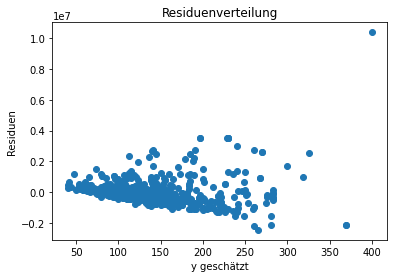

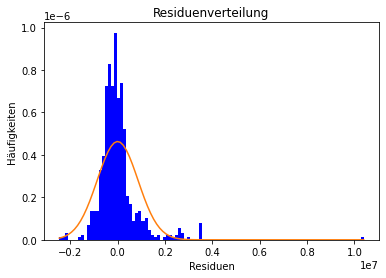

In [248]:
price_livingspace(by_type['type_attic-flat'])

Für die Attikawohnungen erhalten wir schon ein wesentlich aussagekräftigeres Modell.
Sehen jedoch einige ausreisser im oberen Pressigment, welche unser Modell verfälschen.
Mit zunehmender Wohnfläche vergrössert sich die Streuung des Preises.
Hier müsste man allenfalls den Standort genauer untersuchen (Stadtnähe, Stockwerk, etc. verfälschen unser einfaches Modell)

R^2:  0.3968574432800156
MAE:  742012970359.1841
MAPE:  48.19411679179585
RMSE:  861401.7473625091


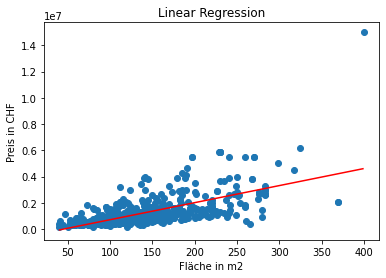

In [249]:
price_livingspace_ridge(by_type['type_attic-flat'])

R^2:  0.3968574432801162
MAE:  742012970359.0605
MAPE:  91.18631557065349
RMSE:  861401.7473624374


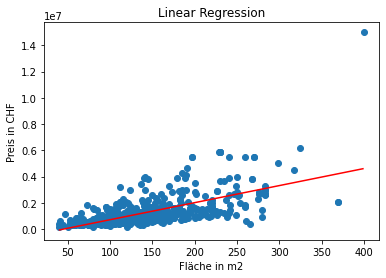

In [250]:
price_livingspace_lasso(by_type['type_attic-flat'])

Wir sehen, dass sich die Regressionen bei nur einem Feature nicht unterscheiden.
Grund dafür ist, dass die Ridge- sowie die Lasso-Regression einen Straftherm beinhalten, welcher unwichtige Features ausblendet (ganz oder beinahe).
Bei nur einem Feature ist es jedoch nicht möglich, dass ein Feature unwichtig ist, da es nur ein Feature gibt.

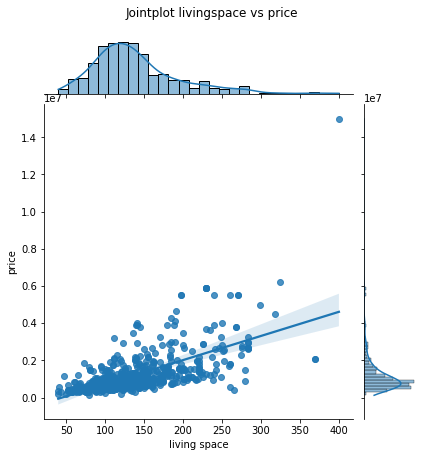

In [251]:
# distribution of price and living space
fig = sns.jointplot(y = by_type['type_attic-flat']['price_cleaned'], x= by_type['type_attic-flat']['Living space'], kind='reg')
fig.fig.suptitle('Jointplot livingspace vs price', y=1.05)
fig.set_axis_labels('living space', 'price')
plt.show()

Um unsere Regression zu verbessern versuchen wir die Daten zu transformieren.

In [252]:
by_type['type_attic-flat']['Living space'] = by_type['type_attic-flat']['Living space']**2

C:\Users\yanni\AppData\Local\Temp\ipykernel_23960\2220886971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_type['type_attic-flat']['Living space'] = by_type['type_attic-flat']['Living space']**2


In [253]:
by_type['type_attic-flat']['price_cleaned'] = by_type['type_attic-flat']['price_cleaned']**0.5

C:\Users\yanni\AppData\Local\Temp\ipykernel_23960\3779086945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_type['type_attic-flat']['price_cleaned'] = by_type['type_attic-flat']['price_cleaned']**0.5


R^2:  0.4555842154375668
MAE:  78319.9017750553
MAPE:  19.21675671372099
RMSE:  279.8569309040877


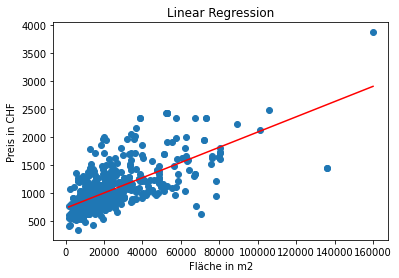

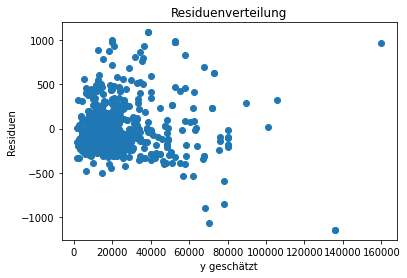

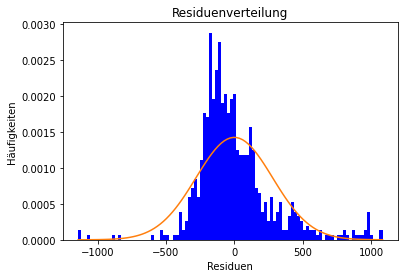

In [254]:
price_livingspace(by_type['type_attic-flat'])

##### castle

R^2:  0.08499347460488205
MAE:  1377329756528.9192
MAPE:  73.72369808774822
RMSE:  1173596.931032507


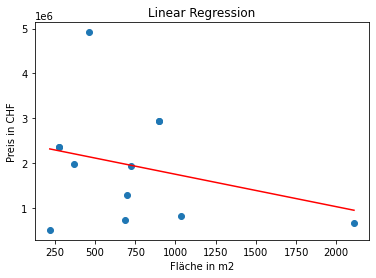

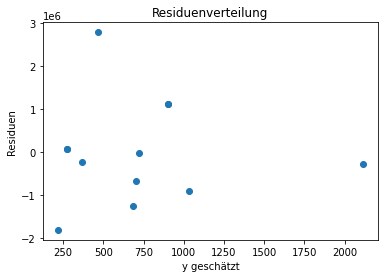

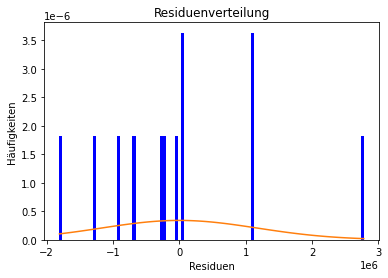

In [255]:
price_livingspace(by_type['type_castle'])

Hier sehen wir ein Modell, bei welchem die Steigung nahe an Null geht und lediglich der Intercept entscheidend ist,
Das Modell performt jedoch auch sehr schlecht.

##### attic-room

R^2:  0.923827290023324
MAE:  36653183964.327225
MAPE:  19.877909560985938
RMSE:  191450.21275602496


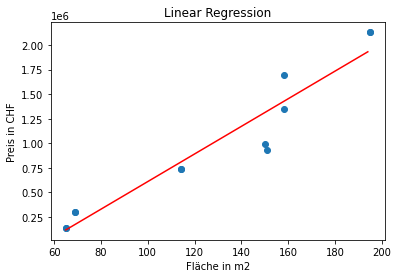

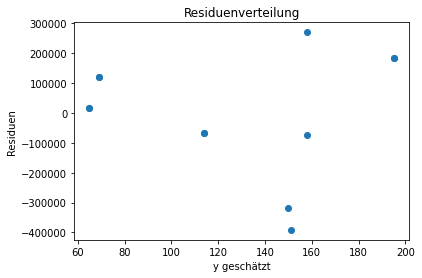

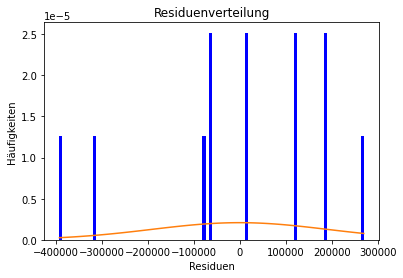

In [256]:
price_livingspace(by_type['type_attic-room'])

Dieses Modell performt mit einem Score von 97% sehr gut, was jedoch auch an den wenigen Datenpunkten geschuldet ist.
Dennoch sehen wir einen schönen Linearen anstieg des Preises.

##### detached_house

R^2:  0.1295930748444808
MAE:  5680299490659.012
MAPE:  130.63064966533335
RMSE:  2383337.8884788896


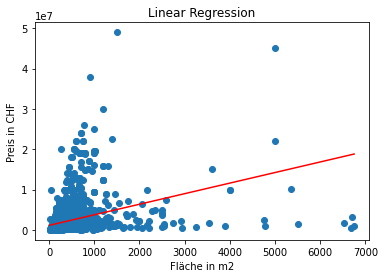

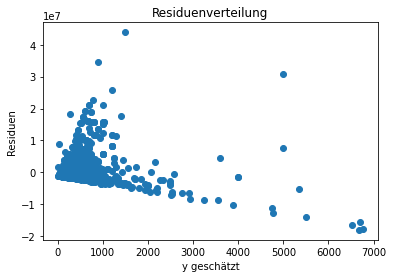

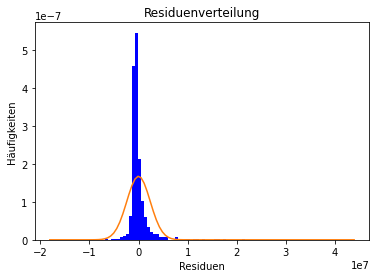

In [257]:
price_livingspace(by_type['type_detached-house'])

Auch hier haben wir wieder das ähnliche Problem wie bei den Chalets.
Es scheint wichtige weitere Einflüsse auf den Preis zu geben, welche in einem guten Vorhersagemodell auch beachtet werden müssen.

##### rustico

R^2:  0.025115894044709708
MAE:  130848885910.22778
MAPE:  81.61507253554424
RMSE:  361730.4050121137


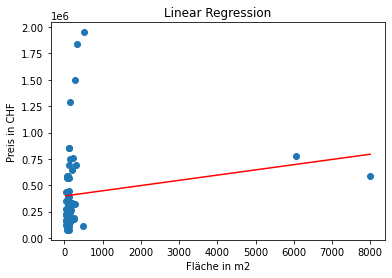

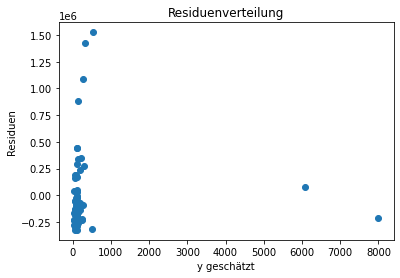

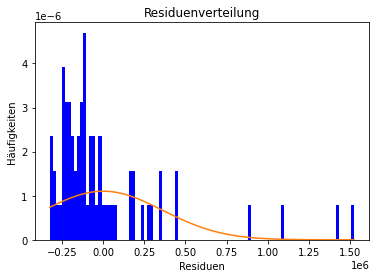

In [258]:
price_livingspace(by_type['type_rustico'])

In diesem Beispiel sehen wir gut wie ein Ausreisser das Modell extrem verfälschen kann.
unten sehen Sie das Modell, in welchem die Ausreisser aussortiert werden.

In [259]:
#delete all rows with living_space_m2 > 1000
df_rustico = by_type['type_rustico']

df_rustico = df_rustico[df_rustico['Living space'] < 1000]

R^2:  0.27332197111242995
MAE:  98642131654.55988
MAPE:  80.21850010872461
RMSE:  314073.4494581799


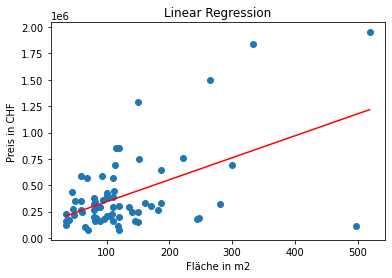

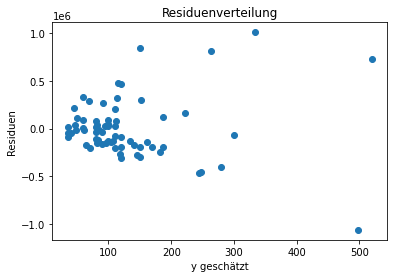

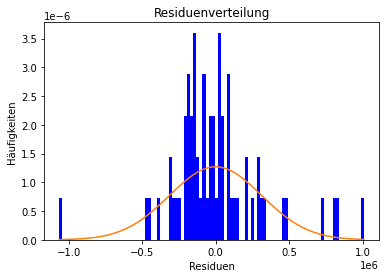

In [260]:
price_livingspace(df_rustico)

Das Modell performt gleich massiv besser.
Wir sehen welch grosse Einflüsse Ausreisser auf unser Modell haben kann.

#### Linear Regression with normalized Data

In [261]:
from sklearn import preprocessing
#Dataframe mit allen Wohnungen
df_rustico = by_type['type_rustico']

# select price and living space from df_rustico and safe in a new dataframe
y,x = df_rustico['price_cleaned'].values, df_rustico['Living space'].values

#cleaning Data
mask = ~pd.isna(x) & ~pd.isna(y)
x = x[mask].reshape(-1,1)
y = y[mask].reshape(-1,1)

x_normalized = preprocessing.normalize(x, axis=0).reshape(-1,1)

# create new dataframe with y as 'price' and x_normalized as 'Living space'
df_rustico_normalized = pd.DataFrame({'price_cleaned': y.reshape(-1), 'Living space': x_normalized.reshape(-1)})
df_rustico_normalized.head(5)


,price_cleaned,Living space
0,585000.0,0.789896
1,395000.0,0.009874
2,295000.0,0.008393
3,779600.0,0.599531
4,165000.0,0.003456


R^2:  0.025115894044709708
MAE:  130848885910.22778
MAPE:  81.61507253554421
RMSE:  361730.4050121137


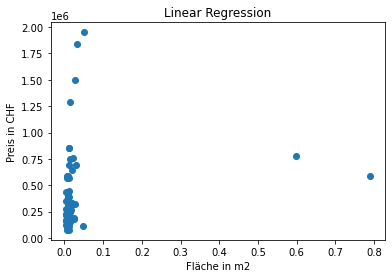

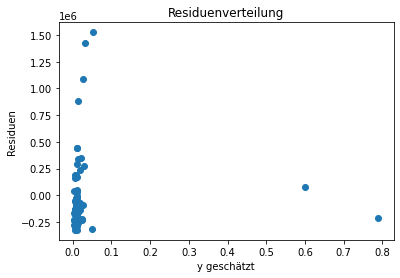

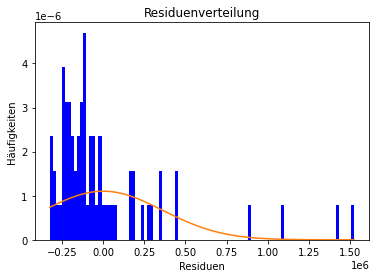

In [262]:
# Linear Regression with Normalized X 
price_livingspace(df_rustico_normalized)

Wie wir sehen nützt uns die Normalisierung bei nur einem Feature nichts, das Modell Performt gleich.
Der selbe Datensatz wurde auch ohne Ausreisser Normalisiert und führte zu gleichem Resultat.